# Student Name: Brian Parle
# Student ID:   18200036


## Initial attempt: Sat Oct 13

### Purpose

The purpose of this E-tivity is to help you become confident in using Numpy’s functionality for matrix manipulation and to learn about a very useful data processing technique: principal components analysis, or PCA. You will find that using Numpy is much easier for matrix manipulation than what you have done to date!

### Task (Complete by Saturday Week 5)

Making use of Numpy, write a Python class to apply the PCA transform to the provided (see Notebook) data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.

1. Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
2. Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
3. Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
4. Store those results from your fit method that are required to transform the data set, in suitable class properties.
5. Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.
 

N.B.:

* Limit your code to the aspects explicitly listed. 
* Use the Jupyter Notebook provided in the repository for week 5. This notebook contains the data that needs to be transformed.
* The required modules have already been imported for you. You should not import any other modules.
* If you find creating a class with this functionality daunting, please start by creating normal functions in your notebook. If time permits, you can then change to use of a class later. 
 

HINTS:

- Numpy.mean() will 'flatten' your tensor by default. To obtain the mean along a given axis, you may use the axis parameter.
- Numpy.cov() assumes by default that data is presented with one observation per column. This can be changed using the rowvar parameter. 
- A Numpy.matrix is a convenient way of performing the matrix operations required for PCA whilst retaining a matrix/vector like structure. Use of this class is discouraged, but would form a good starting point for tackling this week's challenge. Once you have the code working with the matrix class, changing to arrays is relatively straight forward.
- You can use Scikitlearn as follows to check the Eigen vectors that you have found with your 'fit' mehod:
    pca = PCA(n_components=2)
    pca.fit(data)
    print(pca.components_)

You can use Scikitlearn to obtain 
GIT push your implementation and post your manual calculations to E-tivity 5: Linear Algebra in Numpy and Beyond and provide the name of your branch.

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [2]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [3]:
a_x = 0.05
a_y= 10

In [4]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [5]:
data.shape

(20, 2)

In [6]:
print (data)

[[ 0.          3.30649714]
 [ 1.02234573  2.62075349]
 [ 2.04865344 10.80992737]
 [ 3.0605403  13.91013541]
 [ 4.09314028 18.47385509]
 [ 4.96644467 18.71130212]
 [ 5.98963474 20.37603054]
 [ 6.87854018 31.54484907]
 [ 7.97167273 30.70933628]
 [ 9.08350935 35.81948019]
 [ 9.79118695 35.97582225]
 [11.03972883 40.50663654]
 [12.13771634 44.46381866]
 [13.31422563 48.9982566 ]
 [13.99430174 59.83105658]
 [14.7954468  60.33366355]
 [15.63051301 60.47909893]
 [16.89384245 66.23894532]
 [17.66758517 71.22500674]
 [19.41107512 79.13692456]]


In [152]:
class myPCA():
    
    def __init__(self, num_components):
        """
        Set the number of components we want returned.
        This value will be used in fit() to strip out the top num_components vectors
        """
        self.n_components = num_components
        
    def __str__(self):
        """
        provide access to the tensor's internal matrix
        """
        return str(self.np_matrix)
        
    def fit(self, data):
        """
        The fit method needs to calculate the eigenvectors and eigenvalues of the data in matrix
            #1. calc mean
            #2. centre columns
            #3. calc covariance
            #4. calc eigenvalues and eigenvectors usnig numpy eig function
            #5. calc the projection
        """   
        self.np_matrix = data
        self.shape = self.np_matrix.shape
        #1. calc mean
        self.np_mean = np.mean(self.np_matrix.T, axis=1).T
        #2. centre
        self.np_centre = self.np_matrix - self.np_mean
        #3. calculate covariance
        self.np_cov = np.cov(self.np_centre, rowvar=False)
        #4. calculate eigenvectors and eigenvalues
        self.np_eigenvalues, self.np_eigenvectors = eig(self.np_cov)
        #- sort eigenvectors by absolute value of eigenvalues - ascending
        array_sort = np.argsort(abs(self.np_eigenvalues))
        # reverse sort order so index of largest eigenvector is first
        array_sort = array_sort[::-1]
        self.np_eigenvalues = self.np_eigenvalues[array_sort]
        #transpose the eigenvectors as linalg returns the vectors in columns
        self.np_eigenvectors = self.np_eigenvectors.T[array_sort]
        # reduce to number of components specified
        self.np_eigenvalues = self.np_eigenvalues[:self.n_components]
        self.np_eigenvectors = self.np_eigenvectors[:self.n_components]
        
        return self.np_eigenvalues, self.np_eigenvectors
    
    def transform(self, data):
        """
        The transform function transforms the data using results from fit.
        """
        #5. calculate the projection
        data = data - self.np_mean
        self.np_projection = self.np_eigenvectors.dot(data.T)
        
        #return the projection
        return self.np_projection.T
    
    def inverse_transform(self, data):
        """
        Return the Original Data Reduced with Mean added
        """
        return np.dot(self.np_eigenvectors.T, self.np_projection).T + self.np_mean

#
#  ignore
#
#A = myPCA(2)
#A.fit(data)
#print (A.np_eigenvalues)
#print (A.np_eigenvectors)
#print (A.transform(data))
#A.transform(data)
#print (A.inverse_transform(data))

#now calculate using scikit
#pca = PCA(n_components=2)
#pca.fit(data)
#print(pca.explained_variance_)
#print(pca.components_)
#print(pca.transform(data))
#pca.transform(data)
#print(pca.inverse_transform(data))

In [154]:
#Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. 
#Compare your results to the output of Scikitlearn's fit method and document your findings 
#as a comment (use markdown) directly under the cell with your PCA class.
A = myPCA(2)
A.fit(data)
print (A.np_eigenvalues)
print (A.np_eigenvectors)

#now calculate using scikit
pca = PCA(n_components=2)
pca.fit(data)
print(pca.explained_variance_)
print(pca.components_)

[5.70291891e+02 4.30455976e-01]
[[-0.24535793 -0.96943256]
 [-0.96943256  0.24535793]]
[5.70291891e+02 4.30455976e-01]
[[ 0.24535793  0.96943256]
 [-0.96943256  0.24535793]]


These are the output eigenvectors from my class and the scikit PCA:

My Class: 

[[-0.24535793 -0.96943256]
 [-0.96943256  0.24535793]]
 
scikit PCA:

[[ 0.24535793  0.96943256]
 [-0.96943256  0.24535793]]
 
The sign of the eigenvector is different, indicating that the vectors are pointing in opposite directions, but the magnitiudes are the same.

These are the output eigenvalues frommy class and the scikit PCA:

MyPCA [5.70291891e+02 4.30455976e-01]

Scikit PCA: [5.70291891e+02 4.30455976e-01]

The eigenvalues are exactly the same. The eigen values are sorted by size.

In [156]:
#2. Use the Scikitlearn's PCA class with n_components=2 and n_components=1 and observe the differences. 
#   In the cell directly below, comment on what you have observed.
pca = PCA(n_components=2)
pca.fit(data)
print("* PCA Components: 2")
print(pca.components_)
print(pca.explained_variance_)
pca = PCA(n_components=1)
pca.fit(data)
print("* PCA Components: 1")
print(pca.components_)
print(pca.explained_variance_)

* PCA Components: 2
[[ 0.24535793  0.96943256]
 [-0.96943256  0.24535793]]
[5.70291891e+02 4.30455976e-01]
* PCA Components: 1
[[0.24535793 0.96943256]]
[570.29189123]


With n_components=2, scikit has returned a 2x1 matrix of eigenvectors ordered by the eigenvalues of the vectors
With n_components=1, scikit has returned a 1x2 matrix with only the eigenvector with the highest eigenvalue returned. 

#### Reflect (Complete by Saturday Week 6)

With your code (containing any corrections you have made based on your peers’ feedback), do the following:

1. For the case where n_components = 1, compare the resulting dataset of your transform method with the resulting dataset from Scikitlearn’s transform method by plotting the points on an XY plot. If there are any differences, explain these in a comment directly under the cell with your plot.
2. For the case where n_components = 1, compare the dataset resulting from your transform method with the original dataset by plotting the points on an XY plot. Comment on the differences between original and transformed data in the cell directly below your plot. In your comment, explain why and how PCA can be used for dimensionality reduction
 

HINTS:

You can use Scitkitlean as follows to calculate the new values of the data points in the original dataset when you reduce the dimensions of the data (from 2) to 1: 
pca = PCA(n_components=1)
pca.fit(data)
data_pca = pca.transform(data)
data_reduced = pca.inverse_transform(data_pca)

You can use plots to compare the values in your original dataset with the dataset with reduced dimensionality:
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()

You can use your own PCA results to calculate the new values of the data points int the original dataset when you reduce the dimensions of the data (from 2) to 1:
reduced = np.dot(features[:,0],red_highvar.T)+mean.T

with:
- reduced: a 2x20 matrix of the new values of the dataset with dimensionality reduction applied
- features[:,0]: the 2x1 matrix (or column vector) which contains the Eigen vector associated with the highest variance
- red_highvar: a 20x1 matrix containing the reduced dataset which is the output of your transform method with n_components set to 1. 
- mean: a 1x2 matrix of the per-column mean values of your original data
- T: the transform operator as provided by Numpy

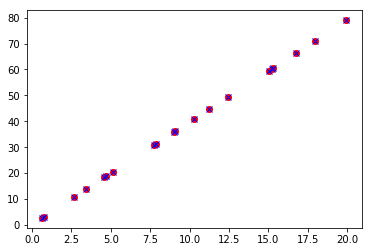

In [159]:
#1. For the case where n_components = 1, compare the resulting dataset of your transform 
#method with the resulting dataset from Scikitlearn’s transform method by plotting the 
#points on an XY plot. If there are any differences, explain these in a comment directly 
#under the cell with your plot.

#Re-using the dataset above, with components=1, plot output from my class and Scikitlean
pca = PCA(n_components=1) 
pca.fit(data) 
scikit_data_pca = pca.transform(data) 
scikit_data_reduced = pca.inverse_transform(scikit_data_pca)

A = myPCA(1)
A.fit(data)
my_data_pca = A.transform(data)
my_data_reduced = A.inverse_transform(data)

#generate the plot
plt.plot(my_data_reduced[:,0], my_data_reduced[:,1], 'or') 
plt.plot(scikit_data_reduced[:,0], scikit_data_reduced[:,1],'xb') 
plt.show()

The data from myPCA and the scikit PCA is (visually) identical as the data points from the 2 datasets correlate.

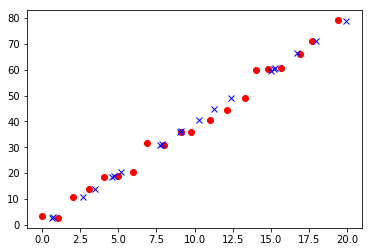

In [161]:
#2. For the case where n_components = 1, compare the dataset resulting from your transform 
#method with the original dataset by plotting the points on an XY plot. Comment on the 
#differences between original and transformed data in the cell directly below your plot. 
#In your comment, explain why and how PCA can be used for dimensionality reduction.

#Re-using the dataset above, with components=1, plot output from my class and Scikitlean
pca = PCA(n_components=1) 
pca.fit(data) 
scikit_data_pca = pca.transform(data) 
scikit_data_reduced = pca.inverse_transform(scikit_data_pca)

A = myPCA(1)
A.fit(data)
my_data_pca = A.transform(data)
my_data_reduced = A.inverse_transform(data)

#generate the plots
plt.plot(data[:,0], data[:,1], 'or') 
plt.plot(my_data_reduced[:,0], my_data_reduced[:,1],'xb') 
plt.show()

Since only 1 component is being used, we are losing some data from the original dataset in the final transformed dataset. This loss is visually apparent as the data pooints form the 2 datasets are misaligned. The loss is equivalent to the sum of the ratios of the eliminated components.